In [1]:
# Install the ultralytics package from PyPI
! pip install ultralytics
! pip install wandb

In [2]:
# Importing the required libraries
import os
import random
import pandas as pd
import wandb

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
from ultralytics import YOLO
%matplotlib inline

In [3]:
# Wandb login:
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: jayaprithvyraj. Use `wandb login --relogin` to force relogin


True

In [4]:
# Define the paths to the images and labels directories
train_images = 'C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/train/images'
train_labels = 'C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/train/labels'

val_images = 'C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/valid/images'
val_labels = 'C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/valid/labels'

test_images = 'C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/test/images'
test_labels = 'C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/test/labels'

# Define the path to the yaml data file
yaml_path = 'C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/data.yaml'

In [18]:
# Define the labels
classes = ['engine-chasis', 'exhaust', 'frontside', 'handlebar', 'motorbike', 'rearside', 'seat', 'tank', 'watermark', 'wheel']
Idx2Label = {idx: label for idx, label in enumerate(classes)}
Label2Index = {label: idx for idx, label in Idx2Label.items()}
print('Index to Label Mapping:', Idx2Label)
print('Label to Index Mapping:', Label2Index)

Index to Label Mapping: {0: 'engine-chasis', 1: 'exhaust', 2: 'frontside', 3: 'handlebar', 4: 'motorbike', 5: 'rearside', 6: 'seat', 7: 'tank', 8: 'watermark', 9: 'wheel'}
Label to Index Mapping: {'engine-chasis': 0, 'exhaust': 1, 'frontside': 2, 'handlebar': 3, 'motorbike': 4, 'rearside': 5, 'seat': 6, 'tank': 7, 'watermark': 8, 'wheel': 9}


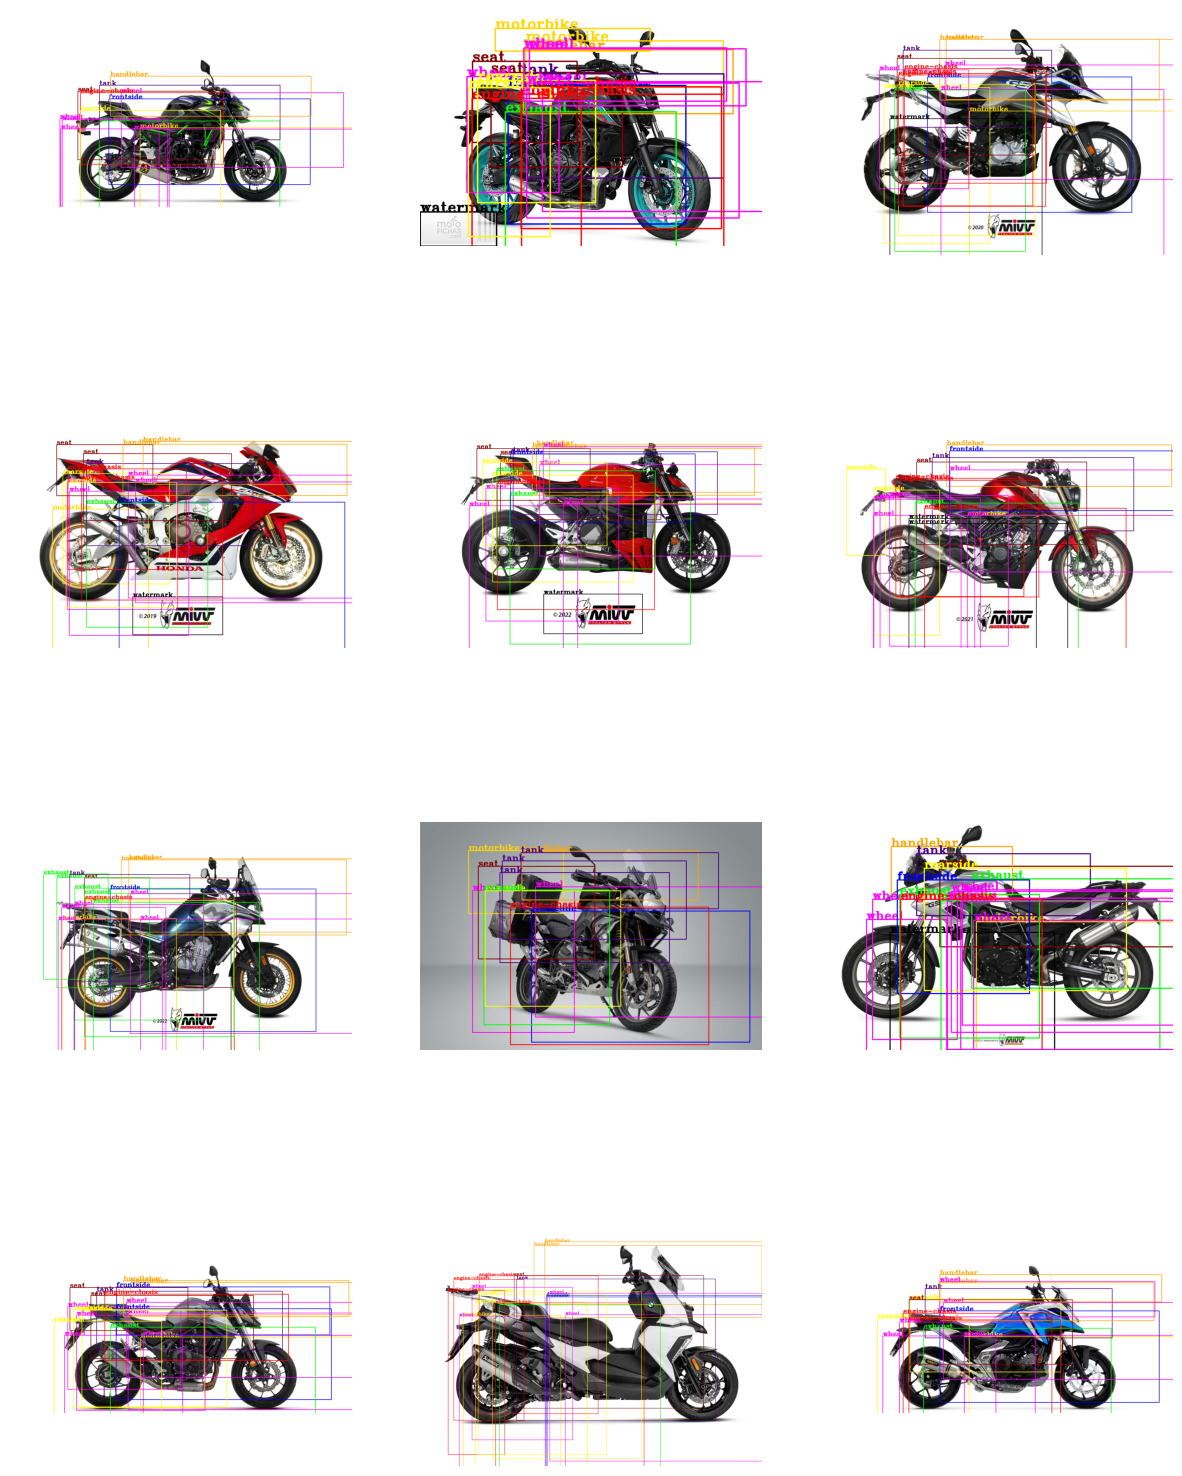

In [22]:
def visualize_image_with_annotation_bboxes(image_dir, label_dir, Idx2Label):
    # Get list of all the image files in the directory
    image_files = sorted(os.listdir(image_dir))
    
    # Choose 10 random image files from the list
    sample_image_files = random.sample(image_files, 12)
    
    # Set up the plot
    fig, axs = plt.subplots(4, 3, figsize=(15, 20))

    class_colors = {
        'engine-chasis': (255, 0, 0),  # red
        'exhaust': (0, 255, 0),  # green
        'frontside': (0, 0, 255),  # blue
        'rearside': (255, 255, 0),  # yellow
        'wheel': (255, 0, 255),  # magenta
        'tank': (75, 0, 130), #purple
        'handlebar': (255, 165, 0), #orange
        'motorbike': (255, 215, 0),
        'seat': (128, 0, 0),
        'watermark':(0, 0, 0)

        # add more classes and colors as needed
    }

    # Loop over the random images and plot the bounding boxes
    for i, image_file in enumerate(sample_image_files):
        row = i // 3
        col = i % 3
        
        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Load the labels for this image
        label_path = os.path.join(label_dir, image_file[:-4] + '.txt')
        f = open(label_path, 'r')
        
        # Loop over the labels and plot the bounding boxes
        for label in f:
            values = list(map(float, label.split()))
            class_id, x_center, y_center, width, height = values[:5]
            h, w, _ = image.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)

            class_label = Idx2Label[int(class_id)]
            color = class_colors.get(class_label)

            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
            cv2.putText(image, Idx2Label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_TRIPLEX, fontScale=1, color=color, thickness=2)
    
        axs[row, col].imshow(image)
        axs[row, col].axis('off')

    plt.show()

# Visualize 6 sample images with bounding boxes
visualize_image_with_annotation_bboxes(train_images, train_labels, Idx2Label)

In [20]:
# Read a image by path
image_path = os.path.join(train_images, os.listdir(train_images)[100])
image = cv2.imread(image_path)

# Get the size of the image
height, width, channels = image.shape
print('The image has dimensions {}x{} and {} channels'.format(height, width, channels))

The image has dimensions 700x1600 and 3 channels


In [21]:
# Load a pretrained nano model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
results = model.train(
    data='C:/Users/jayap/Downloads/ML_Projects/Segment_Anything_Motorcycle/Motorbike_parts.v2i.yolov8/data.yaml',
    epochs=5,
    imgsz=(height, width, channels),
    seed=42,
    batch=16, 
    workers=4,
    name='yolov8n_custom')

New https://pypi.org/project/ultralytics/8.2.73 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.195  Python-3.11.2 torch-2.1.0+cpu CPU (AMD Ryzen 7 3700U with Radeon Vega Mobile Gfx)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/jayap/Downloads/ML_Projects/Underwater_Object_Detection/working/data.yaml, epochs=5, patience=50, batch=16, imgsz=(700, 1600, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

Freezing layer 'model.22.dfl.conv.weight'
WARNING  updating to 'imgsz=1600'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
train: Scanning C:\Users\jayap\Downloads\ML_Projects\Underwater_Object_Detection\aquarium_pretrain\train\labels.cache... 448 images, 1 backgrounds, 0 corrupt: 100%|██████████| 448/448 [00:00<?, ?it/s]
val: Scanning C:\Users\jayap\Downloads\ML_Projects\Underwater_Object_Detection\aquarium_pretrain\valid\labels.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████| 127/127 [00:00<?, ?it/s]
Plotting labels to runs\detect\yolov8n_custom\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image 

In [ ]:
%matplotlib inline

df = pd.read_csv 